In [1]:
# Import necessary libraries
import os
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

2024-12-04 22:17:43.364299: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
def extract_features(file_path):
    try:
        # Load audio file (limit duration to 5 seconds)
        y, sr = librosa.load(file_path, duration=5.0)
        print(f"Loaded audio: {file_path}, duration: {len(y)} samples")  # Debugging

        # Extract MFCC (Mel Frequency Cepstral Coefficients)
        mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

        if mfcc.size == 0:
            print(f"Warning: Empty MFCC for file {file_path}")
            return None  # Return None if no features are extracted

        # Normalize features by averaging MFCC coefficients across time
        mfcc_mean = np.mean(mfcc.T, axis=0)  # Reduce (13, time_steps) to (13,)
        return mfcc_mean
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None  # Return None if there's an error

In [12]:
def load_data(directory):
    features = []
    labels = []
    print(f"Scanning directory: {directory}")
    for root, dirs, files in os.walk(directory):  # Recursively walk through directories
        for filename in files:
            print(f"Found file: {filename}")  # Debugging
            if filename.endswith('.wav'):  # Only process .wav files
                file_path = os.path.join(root, filename)
                print(f"Processing file: {file_path}")  # Debugging
                feature = extract_features(file_path)
                if feature is not None:  # Ensure features are not None
                    print(f"Feature shape: {feature.shape} for file {file_path}")  # Debugging
                    label = os.path.basename(root)  # Use the directory name as the label
                    features.append(feature)
                    labels.append(label)
                else:
                    print(f"Warning: Feature extraction failed for {file_path}")
    features = np.array(features)  # Convert features to a NumPy array
    labels = np.array(labels)
    print(f"Loaded {len(features)} features and {len(labels)} labels.")  # Summary
    return features, labels


In [13]:
import os

directory = "/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds"  # Replace with the actual directory path
if os.path.exists(directory):
    print(f"Directory exists: {directory}")
    print("Files and subdirectories:")
    for root, dirs, files in os.walk(directory):
        print(f"In {root}:")
        print(f"  Directories: {dirs}")
        print(f"  Files: {files}")
else:
    print(f"Directory does not exist: {directory}")


Directory exists: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds
Files and subdirectories:
In /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds:
  Directories: ['Voice_of_Birds', 'Voice of Birds']
  Files: ['.DS_Store', 'Birds Voice.csv']
In /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds:
  Directories: ['bird_species']
  Files: ['.DS_Store']
In /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species:
  Directories: ['Moluccan Megapode_sound', 'Micronesian Megapode_sound', 'Andean Tinamou_sound', 'Wattled Brushturkey_sound', 'Red-billed Brushturkey_sound', 'Little Tinamou_sound', 'Speckled Chachalaca_sound', 'Somali Ostrich_sound', 'Chestnut-bellied Guan_sound', 'Spixs Guan_sound', 'Rusty-margined Guan_sound', 'Great Spotted Kiwi_sound', 'Brushland Tinamou_sound', 'Huayco Tinamou_sound', 'Vanuatu Megapode_sound', 'Darwins Nothura

In [14]:
# Prompt user for the path to the 'bird_sounds' directory
directory = input("Please enter the path to the 'bird_sounds' directory: ").strip()

# Check if the directory exists
if not os.path.exists(directory):
    print(f"Error: The directory '{directory}' does not exist. Please check the path and try again.")
else:
    # Load the dataset
    X, y = load_data(directory)
    
    if len(y) == 0:
        print("Error: No features were loaded. Exiting.")
    else:
        print(f"Successfully loaded {len(X)} samples.")

Scanning directory: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds
Found file: .DS_Store
Found file: Birds Voice.csv
Found file: .DS_Store
Found file: .DS_Store
Found file: Moluccan Megapode3.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode3.wav
Error processing file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode3.wav: module 'soundfile' has no attribute 'SoundFileRuntimeError'
Found file: Moluccan Megapode2.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluccan Megapode2.wav
Error processing file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice_of_Birds/bird_species/Moluccan Megapode_sound/Moluc

/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/env/lib/python3.12/site-packages/librosa/core/spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=576
  warnings.warn(


Feature shape: (13,) for file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode6.wav
Found file: Dusky Megapode4.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode4.wav
Loaded audio: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode4.wav, duration: 110250 samples
Feature shape: (13,) for file /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode4.wav
Found file: Dusky Megapode5.wav
Processing file: /Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/bird_sounds/Voice of Birds/Voice of Birds/Dusky Megapode_sound/Dusky Megapode5.wav
Loaded audio: /Users/zeynepsalihoglu/Downloads/Birds

In [15]:
# Display the first few labels
unique_labels = np.unique(y)
print(f"Unique labels (bird species): {unique_labels}")

# Check the shape and type of features
print(f"Type of X: {type(X)}")
print(f"Number of feature samples: {len(X)}")
if len(X) > 0:
    print(f"Each feature shape: {X[0].shape} (MFCCs)")

Unique labels (bird species): ['Andean Guan_sound' 'Andean Tinamou_sound' 'Australian Brushturkey_sound'
 'Band-tailed Guan_sound' 'Barred Tinamou_sound' 'Bartletts Tinamou_sound'
 'Baudo Guan_sound' 'Bearded Guan_sound' 'Berlepschs Tinamou_sound'
 'Biak Scrubfowl_sound' 'Black Tinamou_sound'
 'Black-billed Brushturkey_sound' 'Black-capped Tinamou_sound'
 'Black-fronted Piping Guan_sound' 'Blue-throated Piping Guan_sound'
 'Brazilian Tinamou_sound' 'Brown Tinamou_sound' 'Brushland Tinamou_sound'
 'Buff-browed Chachalaca_sound' 'Cauca Guan_sound'
 'Chaco Chachalaca_sound' 'Chestnut-bellied Guan_sound'
 'Chestnut-headed Chachalaca_sound' 'Chestnut-winged Chachalaca_sound'
 'Chilean Tinamou_sound' 'Choco Tinamou_sound' 'Cinereous Tinamou_sound'
 'Collared Brushturkey_sound' 'Colombian Chachalaca_sound'
 'Common Ostrich_sound' 'Crested Guan_sound' 'Curve-billed Tinamou_sound'
 'Darwins Nothura_sound' 'Dusky Megapode_sound' 'Dusky-legged Guan_sound'
 'Dwarf Cassowary_sound' 'Dwarf Tinamou_s

In [40]:
# Assuming X and y are already defined
from collections import Counter
# Step 1: Remove classes with fewer than 2 samples
class_counts = Counter(y)
# Find the classes with fewer than 2 samples
classes_to_remove = {label for label, count in class_counts.items() if count < 2}

# Filter out those labels
X_filtered = [x for x, label in zip(X, y) if label not in classes_to_remove]
y_filtered = [label for label in y if label not in classes_to_remove]

# Check if any features were loaded
if len(X_filtered) == 0:
    print("No valid features to process after removing classes with fewer than 2 samples.")
else:
    print(f"Filtered data size: {len(X_filtered)} samples")

Filtered data size: 2065 samples


In [41]:
# Check if any features were loaded
if len(X) == 0:
    print("No valid features to process.")
else:
    # Step 2: Determine the maximum length of MFCC sequences
    max_length = max([x.shape[0] for x in X_filtered])
    print(f"Maximum sequence length: {max_length}")

    # Pad sequences with zeros to ensure uniform input shape
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    X_padded = pad_sequences(X_filtered, maxlen=max_length, dtype='float32', padding='post', truncating='post')

    # Normalize the features
    X_normalized = X_padded / np.max(X_padded, axis=0)  # Normalize to [0, 1]

    # Encode the labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y_filtered)
    print(f"Encoded labels: {y_encoded[:10]}")


Maximum sequence length: 13
Encoded labels: [59 59 59 59 59 59 58 58 58 58]


In [42]:
import numpy as np

unique, counts = np.unique(y_encoded, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class Distribution:", class_distribution)

Class Distribution: {0: 30, 1: 30, 2: 28, 3: 30, 4: 3, 5: 30, 6: 14, 7: 27, 8: 13, 9: 9, 10: 20, 11: 20, 12: 30, 13: 12, 14: 30, 15: 30, 16: 30, 17: 26, 18: 10, 19: 30, 20: 30, 21: 12, 22: 4, 23: 30, 24: 12, 25: 7, 26: 30, 27: 20, 28: 30, 29: 7, 30: 30, 31: 8, 32: 20, 33: 30, 34: 30, 35: 2, 36: 30, 37: 22, 38: 14, 39: 17, 40: 7, 41: 30, 42: 23, 43: 30, 44: 30, 45: 12, 46: 30, 47: 15, 48: 10, 49: 10, 50: 4, 51: 30, 52: 6, 53: 30, 54: 7, 55: 8, 56: 17, 57: 12, 58: 7, 59: 6, 60: 6, 61: 2, 62: 19, 63: 6, 64: 5, 65: 30, 66: 12, 67: 30, 68: 19, 69: 30, 70: 12, 71: 10, 72: 6, 73: 24, 74: 30, 75: 15, 76: 30, 77: 30, 78: 30, 79: 30, 80: 13, 81: 30, 82: 17, 83: 29, 84: 30, 85: 30, 86: 3, 87: 20, 88: 30, 89: 30, 90: 30, 91: 5, 92: 7, 93: 30, 94: 30, 95: 2, 96: 30, 97: 14, 98: 30, 99: 3, 100: 30, 101: 3, 102: 30, 103: 19, 104: 30, 105: 3}


In [43]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)
print(f"Training data size: {len(X_train)} samples, Test data size: {len(X_test)} samples")

Training data size: 1652 samples, Test data size: 413 samples


In [44]:
# Reshape data for Conv1D (samples, timesteps, features)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (1652, 13, 1)
X_test shape: (413, 13, 1)


In [45]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Flatten, Dense
from keras.optimizers import Adam

# Build the CNN model
model = Sequential([
    # First convolutional layer with 32 filters, kernel size 1, and ReLU activation
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Second convolutional layer with 64 filters, kernel size 1, and ReLU activation
    Conv1D(64, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),
    
    # Third convolutional layer with 128 filters, kernel size 1, and ReLU activation
    Conv1D(128, kernel_size=1, activation='relu'),
    MaxPooling1D(pool_size=2),
    
    # Flatten the output of the convolutional layers
    Flatten(),
    
    # Fully connected layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    # Output layer with softmax activation for multi-class classification
    Dense(len(unique_labels), activation='softmax')  # len(unique_labels) is the number of classes
])

# Compile the model with Adam optimizer and sparse categorical crossentropy loss
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary to understand the structure
model.summary()

/Users/zeynepsalihoglu/Downloads/Birds-Acoustics-Identifier-Model-/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_9 (Conv1D)               │ (None, 13, 32)         │            64 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_10 (Conv1D)              │ (None, 6, 64)          │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_10 (MaxPooling1D) │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 3, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_11 (Conv1D)              │ (None, 3, 128)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_11 (MaxPooling1D) │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 111)            │        14,319 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,327 (161.43 KB)

 Trainable params: 41,327 (161.43 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.0094 - loss: 4.7089 - val_accuracy: 0.0048 - val_loss: 4.6345
Epoch 2/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0109 - loss: 4.5911 - val_accuracy: 0.0194 - val_loss: 4.5937
Epoch 3/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0130 - loss: 4.5377 - val_accuracy: 0.0169 - val_loss: 4.5852
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0126 - loss: 4.5425 - val_accuracy: 0.0048 - val_loss: 4.5721
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0108 - loss: 4.5321 - val_accuracy: 0.0073 - val_loss: 4.5654
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0182 - loss: 4.4819 - val_accuracy: 0.0000e+00 - val_loss: 4.5574
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0210 - loss: 4.4625 - val_accuracy: 0.0145 - val_loss: 4.5418
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0250 - loss: 4.4553 - val_accuracy: 0.0121 - val_l

In [47]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0260 - loss: 4.2838     
Test Loss: 4.28675651550293
Test Accuracy: 0.036319613456726074


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


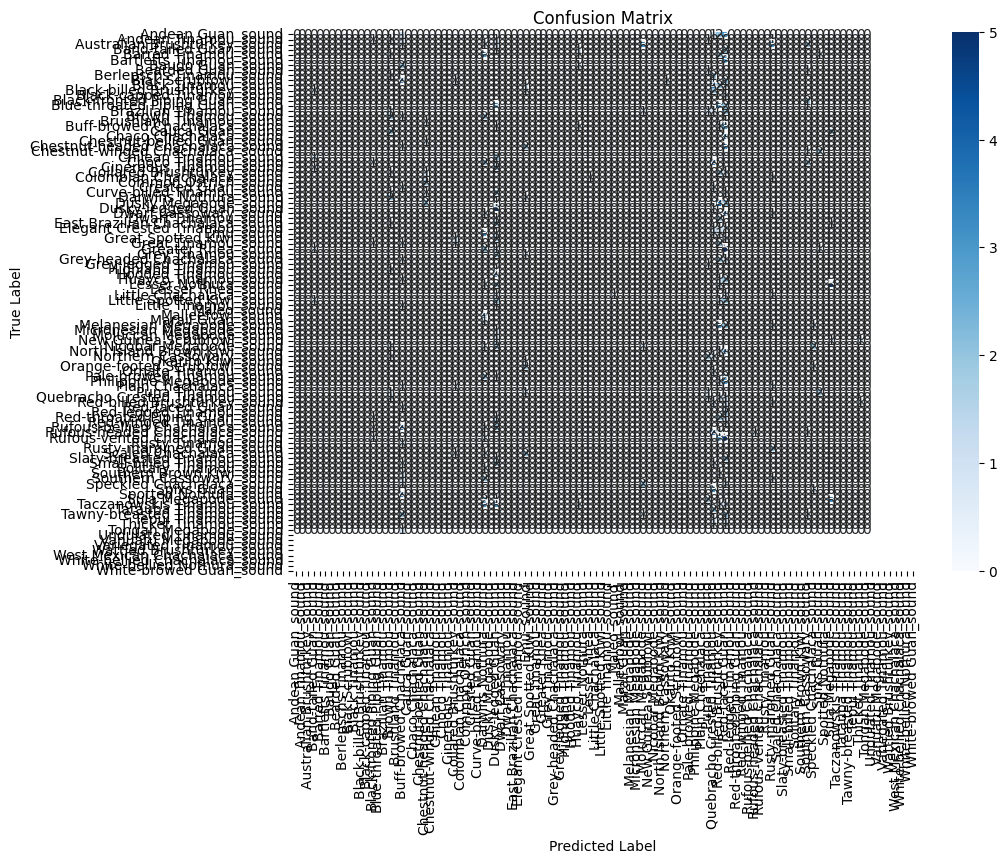

In [48]:
# Predict on the test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the predicted class labels

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix using Seaborn's heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

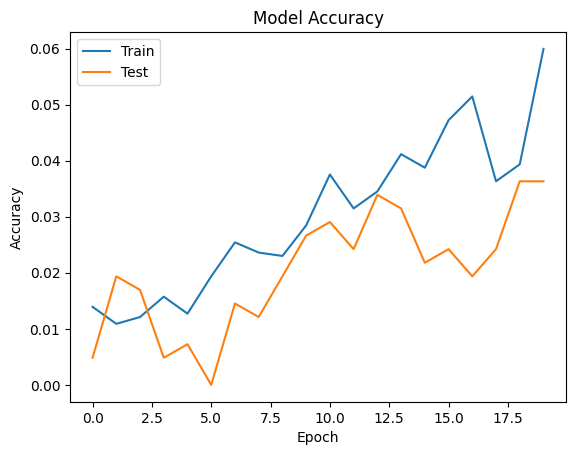

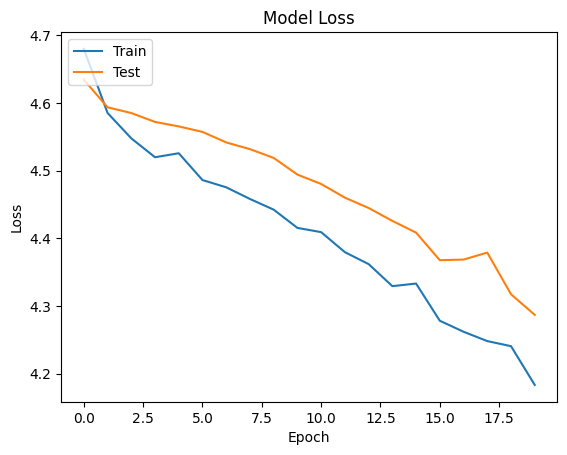

In [49]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
# Save the model to a file
model.save('bird_audio_cnn_model.h5')

In [ ]:
from keras.models import load_model

# Load the model
loaded_model = load_model('bird_audio_cnn_model.h5')

In [ ]:
# Predicting on new data
new_data = X_test[0:5]  # Just an example, use your new data
predictions = loaded_model.predict(new_data)

# Convert the predicted probabilities into class labels
predicted_classes = np.argmax(predictions, axis=1)
print(f"Predicted classes: {predicted_classes}")